#### Table of Contents
- [Prediction with K-Nearest Neighbours](#prediction-with-k-nearest-neighbours)
    - [1. KNN: Full Game](#knn=full-game)
        - [i. Data Preparation](#data-preparation)
        - [ii. Data Visualisation](#data-visualisation)
        - [iii. Data Normalisation](#data-normalisation)
        - [iv. Model Fitting](#model-fitting)
        - [v. Hyper-Parameter Tuning](#hyper-parameter-tuning)
    - [2. KNN: 30 Minutes](#knn-30-minutes)
        - [i. Data Preparation](#data-preparation)
        - [ii. Data Visualisation](#data-visualisation)
        - [iii. Data Normalisation](#data-normalisation)
        - [iv. Model Fitting](#model-fitting)
        - [v. Hyper-Parameter Tuning](#hyper-parameter-tuning)
    - [3. Conclusion](#conclusion)
  
*Author: Oscar*

# Prediction with K-Nearest Neighbours

In this kernel, I will be attempting to predict the outcome of the matches using the KNN model. The KNN model is a supervised learning classifier which uses proximity to make classifications or predictions about the grouping of individual data points. The basic idea is that similar points can be found near one another and finally classified base of *majority vote*. We will be using the default distance metric in sklearn's KNeighboursClassifier(), *Minkowski Distance*.   

$$
\mathrm{Minkowski\: Distance} = \left (\sum_{i=1}^{n} \left | x_{i} - y_{i} \right |\right )^{\frac{1}{p}}
$$

We will be using the variables we have identified as important predictors earlier in our initial EDA for this model.   

Import libraries

In [1]:
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=(FutureWarning, UserWarning, DeprecationWarning))
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from ast import literal_eval
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

---
## KNN: Full Game

### Data Preparation

Here we will prepare and clean the dataset to suit the task at hand. We want to get a dataframe that have each row representing data of each match, and the columns will be the final count of variable at the end of the game.    

In [2]:
# Import Dataset
league_data = pd.read_csv("datasets/LeagueofLegends.csv")

# Shape of Dataset
print("Data dims: ", league_data.shape)

# Sneakpeak of Dataset
league_data.head()

Data dims:  (7620, 57)


League  Year  Season    Type blueTeamTag  bResult  rResult redTeamTag  \
0  NALCS  2015  Spring  Season         TSM        1        0         C9   
1  NALCS  2015  Spring  Season         CST        0        1        DIG   
2  NALCS  2015  Spring  Season         WFX        1        0         GV   
3  NALCS  2015  Spring  Season         TIP        0        1         TL   
4  NALCS  2015  Spring  Season         CLG        1        0         T8   

   gamelength                                           golddiff  ...  \
0          40  [0, 0, -14, -65, -268, -431, -488, -789, -494,...  ...   
1          38  [0, 0, -26, -18, 147, 237, -152, 18, 88, -242,...  ...   
2          40  [0, 0, 10, -60, 34, 37, 589, 1064, 1258, 913, ...  ...   
3          41  [0, 0, -15, 25, 228, -6, -243, 175, -346, 16, ...  ...   
4          35  [40, 40, 44, -36, 113, 158, -121, -191, 23, 20...  ...   

  redMiddleChamp                                      goldredMiddle  \
0           Fizz  [475, 475, 552, 842, 1178, 1378, 1635, 1949, 2...   
1           Azir  [475, 475, 552, 786, 1097, 1389, 1660, 1955, 2...   
2           Azir  [475, 475, 533, 801, 1006, 1233, 1385, 1720, 1...   
3           Lulu  [475, 475, 532, 771, 1046, 1288, 1534, 1776, 2...   
4           Lulu  [475, 475, 532, 807, 1042, 1338, 1646, 1951, 2...   

         redADC redADCChamp  \
0        Sneaky       Sivir   
1        CoreJJ       Corki   
2           Cop       Corki   
3         KEITH      KogMaw   
4  Maplestreet8       Corki   

                                          goldredADC   redSupport  \
0  [475, 475, 532, 762, 1097, 1469, 1726, 2112, 2...  LemonNation   
1  [475, 475, 532, 868, 1220, 1445, 1732, 1979, 2...      KiWiKiD   
2  [475, 475, 533, 781, 1085, 1398, 1782, 1957, 2...   BunnyFuFuu   
3  [475, 475, 532, 766, 1161, 1438, 1776, 1936, 2...      Xpecial   
4  [475, 475, 532, 792, 1187, 1488, 1832, 2136, 2...        Dodo8   

  redSupportChamp                                     goldredSupport  \
0          Thresh  [515, 515, 577, 722, 911, 1042, 1194, 1370, 14...   
1           Annie  [515, 515, 583, 752, 900, 1066, 1236, 1417, 15...   
2           Janna  [515, 515, 584, 721, 858, 1002, 1168, 1303, 14...   
3           Janna  [515, 515, 583, 721, 870, 1059, 1205, 1342, 15...   
4           Annie  [475, 475, 538, 671, 817, 948, 1104, 1240, 136...   

                              redBans  \
0  ['Tristana', 'Leblanc', 'Nidalee']   
1      ['RekSai', 'Janna', 'Leblanc']   
2        ['Leblanc', 'Zed', 'RekSai']   
3      ['RekSai', 'Rumble', 'LeeSin']   
4       ['Rumble', 'Sivir', 'Rengar']   

                                             Address  
0  http://matchhistory.na.leagueoflegends.com/en/...  
1  http://matchhistory.na.leagueoflegends.com/en/...  
2  http://matchhistory.na.leagueoflegends.com/en/...  
3  http://matchhistory.na.leagueoflegends.com/en/...  
4  http://matchhistory.na.leagueoflegends.com/en/...  

[5 rows x 57 columns]

In [3]:
# Make a copy of df to work with
clean_df = league_data.copy(deep=True)

# Make a new column to show winners
clean_df['winner'] = np.where(clean_df['bResult'] == 1, 1, 2)

# Convert columns with lists object to real lists
cols = ['bKills', 'rKills', 'goldblue', 'goldred', 'bTowers', 'rTowers', 'bInhibs', 'rInhibs', 'bDragons', 'rDragons', 'bBarons', 'rBarons', 'bHeralds', 'rHeralds', 'golddiff']

for col in cols:
    clean_df[col] = clean_df[col].apply(literal_eval)

# make a new df with only columns we are onterested in
# sums up all the variables
new_df = pd.DataFrame()

new_df['goldbluetotal'] = clean_df['goldblue'].apply(max)
new_df['bKills'] = clean_df['bKills'].apply(len)
new_df['bTowers'] = clean_df['bTowers'].apply(len)
new_df['bDragons'] = clean_df['bDragons'].apply(len)
new_df['bInhibs'] = clean_df['bInhibs'].apply(len)
new_df['bBarons'] = clean_df['bBarons'].apply(len)
new_df['bHeralds'] = clean_df['bHeralds'].apply(len)

new_df['goldredtotal'] = clean_df['goldred'].apply(max)
new_df['rKills'] = clean_df['rKills'].apply(len)
new_df['rTowers'] = clean_df['rTowers'].apply(len)
new_df['rDragons'] = clean_df['rDragons'].apply(len)
new_df['rInhibs'] = clean_df['rInhibs'].apply(len)
new_df['rBarons'] = clean_df['rBarons'].apply(len)
new_df['rHeralds'] = clean_df['rHeralds'].apply(len)

new_df['winner'] = clean_df['winner']
new_df = new_df.reset_index(drop=True)

new_df

goldbluetotal  bKills  bTowers  bDragons  bInhibs  bBarons  bHeralds  \
0             62729      16        9         1        2        0         0   
1             57702      10        7         3        0        1         0   
2             70270      22       15         4        4        1         0   
3             58612      10        4         0        0        1         0   
4             60269      22        8         2        1        1         0   
...             ...     ...      ...       ...      ...      ...       ...   
7615          57580       7        4         0        0        0         0   
7616          69781       8        5         2        0        2         0   
7617          34602       5        0         0        0        0         0   
7618          68729      16        9         4        1        2         0   
7619          77275      12        4         1        0        0         1   

      goldredtotal  rKills  rTowers  rDragons  rInhibs  rBarons  rHeralds  \
0            56672       9        4         3        0        1         0   
1            56537       9        7         1        1        0         0   
2            56355       8        2         0        0        0         0   
3            63119      21        7         4        1        0         0   
4            48947      10        4         1        0        0         0   
...            ...     ...      ...       ...      ...      ...       ...   
7615         65618      16        9         3        1        2         0   
7616         70498      18       10         2        2        0         1   
7617         52338      13       11         2        3        1         1   
7618         57221       2        3         0        0        0         0   
7619         82598      23       11         3        3        2         0   

      winner  
0          1  
1          2  
2          1  
3          2  
4          1  
...      ...  
7615       2  
7616       2  
7617       2  
7618       1  
7619       2  

[7620 rows x 15 columns]

In [4]:
# make a df where each row is info of each team for a particular match
blue_matches = pd.DataFrame()

blue_matches['TotalGold'] = new_df['goldbluetotal']
blue_matches['TotalKills'] = new_df['bKills']
blue_matches['TotalTowers'] = new_df['bTowers']
blue_matches['TotalDragons'] = new_df['bDragons']
blue_matches['TotalInhibs'] = new_df['bInhibs']
blue_matches['TotalBarons'] = new_df['bBarons']
blue_matches['TotalHeralds'] = new_df['bHeralds']
blue_matches['won'] = False
blue_matches.loc[new_df['winner'] == 1, 'won'] = True

red_matches = pd.DataFrame()

red_matches['TotalGold'] = new_df['goldredtotal']
red_matches['TotalKills'] = new_df['rKills']
red_matches['TotalTowers'] = new_df['rTowers']
red_matches['TotalDragons'] = new_df['rDragons']
red_matches['TotalInhibs'] = new_df['rInhibs']
red_matches['TotalBarons'] = new_df['rBarons']
red_matches['TotalHeralds'] = new_df['rHeralds']
red_matches['won'] = False
red_matches.loc[new_df['winner'] == 2, 'won'] = True

all_matches = pd.concat([blue_matches, red_matches])

all_matches

TotalGold  TotalKills  TotalTowers  TotalDragons  TotalInhibs  \
0         62729          16            9             1            2   
1         57702          10            7             3            0   
2         70270          22           15             4            4   
3         58612          10            4             0            0   
4         60269          22            8             2            1   
...         ...         ...          ...           ...          ...   
7615      65618          16            9             3            1   
7616      70498          18           10             2            2   
7617      52338          13           11             2            3   
7618      57221           2            3             0            0   
7619      82598          23           11             3            3   

      TotalBarons  TotalHeralds    won  
0               0             0   True  
1               1             0  False  
2               1             0   True  
3               1             0  False  
4               1             0   True  
...           ...           ...    ...  
7615            2             0   True  
7616            0             1   True  
7617            1             1   True  
7618            0             0  False  
7619            2             0   True  

[15240 rows x 8 columns]

### Data Visualisation

Here, we will do a pair plot for each variable to visualise if there are any obvious groupings.


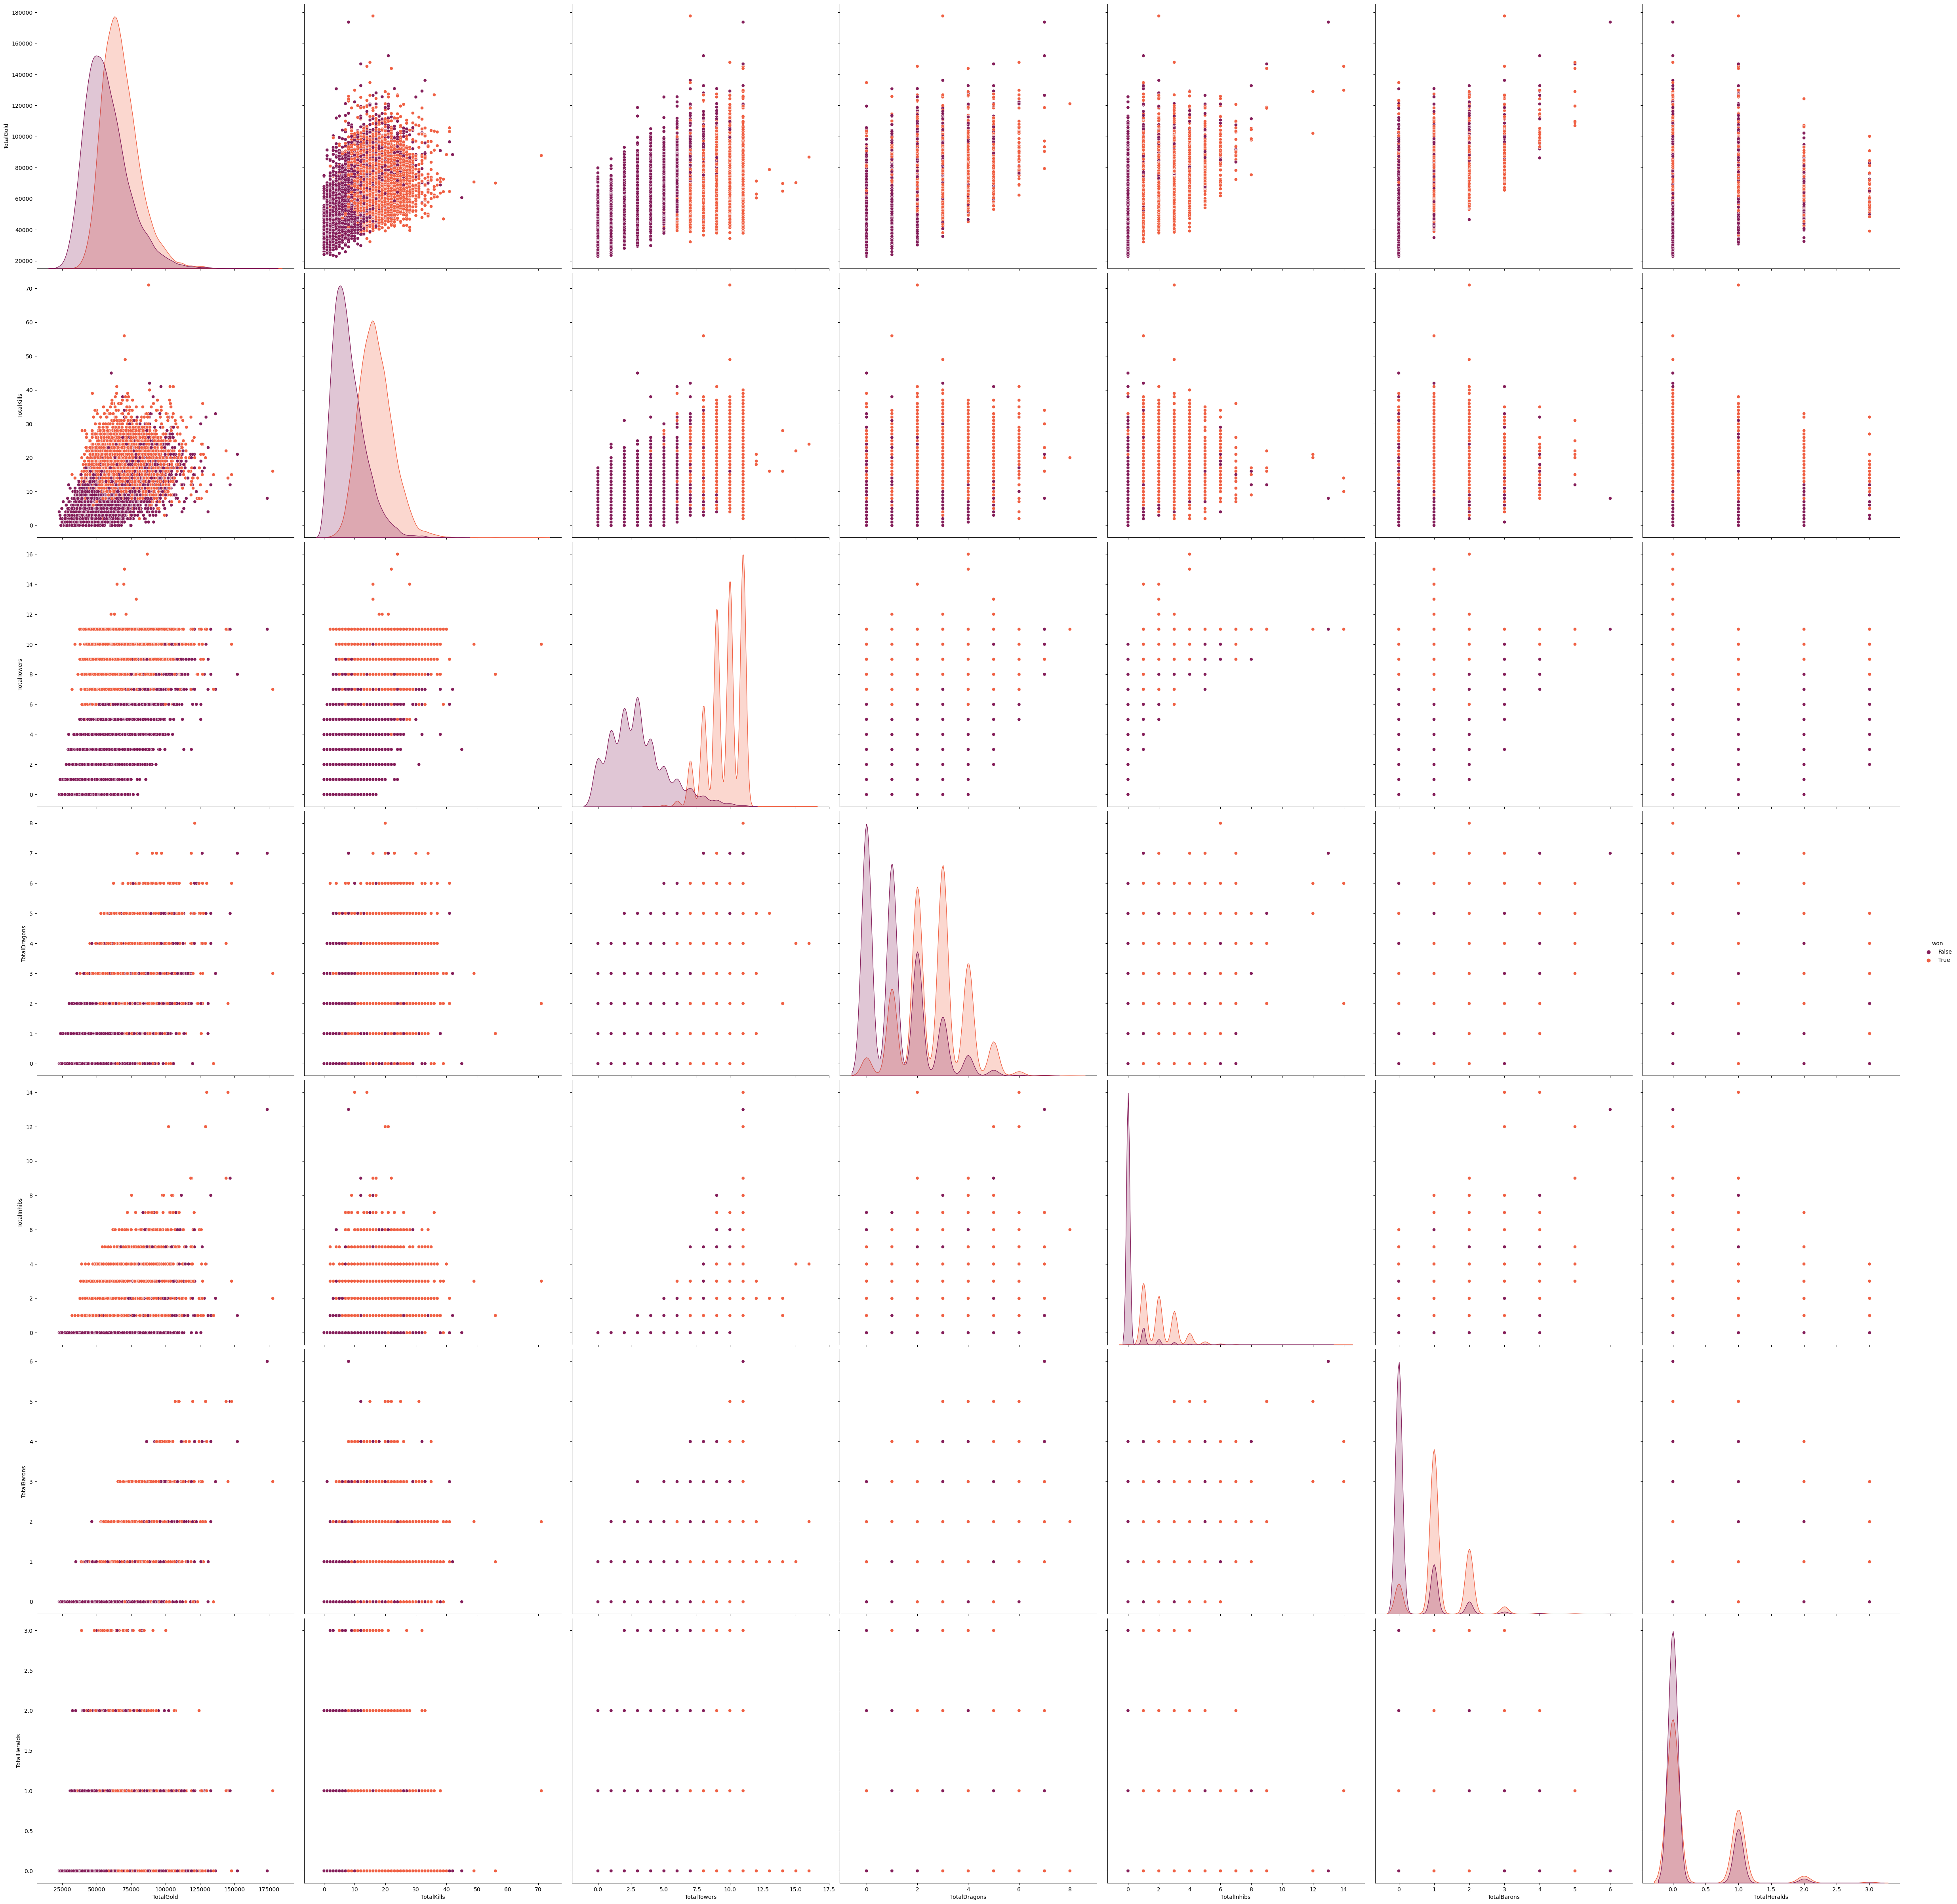

In [5]:
sns.pairplot(all_matches, hue='won', height=7, palette='rocket')
plt.show()

We can see that there are some obvious groupings in many of the pairplots such as *TotalGold vs TotalKills* or *TotalKills vs TotalTowers*.

### Data Normalisation

We will scale our data here to ensure that our model will be optimised. This is neccessary since the data are of different scale, especially **gold** which is in the thousands while the rest of the variables are in the tens.

In [6]:
x_data = all_matches.drop(['won'], axis=1)
y_data = all_matches['won']

MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)

data = pd.DataFrame(X_data_minmax, columns=['TotalGold', 'TotalKills', 'TotalTowers', 'TotalDragons', 'TotalInhibs', 'TotalBarons', 'TotalHeralds'])
data

TotalGold  TotalKills  TotalTowers  TotalDragons  TotalInhibs  \
0       0.257393    0.225352       0.5625         0.125     0.142857   
1       0.224922    0.140845       0.4375         0.375     0.000000   
2       0.306101    0.309859       0.9375         0.500     0.285714   
3       0.230800    0.140845       0.2500         0.000     0.000000   
4       0.241503    0.309859       0.5000         0.250     0.071429   
...          ...         ...          ...           ...          ...   
15235   0.276053    0.225352       0.5625         0.375     0.071429   
15236   0.307574    0.253521       0.6250         0.250     0.142857   
15237   0.190275    0.183099       0.6875         0.250     0.214286   
15238   0.221815    0.028169       0.1875         0.000     0.000000   
15239   0.385730    0.323944       0.6875         0.375     0.214286   

       TotalBarons  TotalHeralds  
0         0.000000      0.000000  
1         0.166667      0.000000  
2         0.166667      0.000000  
3         0.166667      0.000000  
4         0.166667      0.000000  
...            ...           ...  
15235     0.333333      0.000000  
15236     0.000000      0.333333  
15237     0.166667      0.333333  
15238     0.000000      0.000000  
15239     0.333333      0.000000  

[15240 rows x 7 columns]

### Model Fitting

Now we are ready to train the data. We will first split the dataset into train/test (8:2) and  we will be using sklearn's KNN model.

classification_report:
              precision    recall  f1-score   support

       False       0.97      0.94      0.95      1559
        True       0.94      0.96      0.95      1489

    accuracy                           0.95      3048
   macro avg       0.95      0.95      0.95      3048
weighted avg       0.95      0.95      0.95      3048

Accuracy:  0.9537401574803149


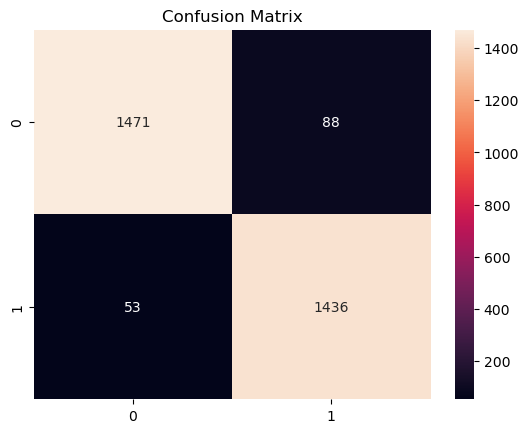

In [7]:
# train test split here
X_train, X_test, y_train, y_test = train_test_split(data, y_data, test_size=0.2, random_state=1)

def KNN(n_neighbours, print_result=False):
    knn = KNeighborsClassifier(n_neighbors=n_neighbours, )
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if print_result==True:
        sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
        plt.title("Confusion Matrix")
        print('classification_report:')
        print(classification_report(y_test, y_pred))
    return accuracy

print('Accuracy: ',KNN(1, True))

It seems like we are able to get a really high accuracy of **~95%**! 

### Hyper Parameter Tuning

Now let's try to optimise the number of neighbours. We can do this by plotting a accuracy graph over k-size.   

The best accuracy is 0.96260 with 8 nearest neighbours.


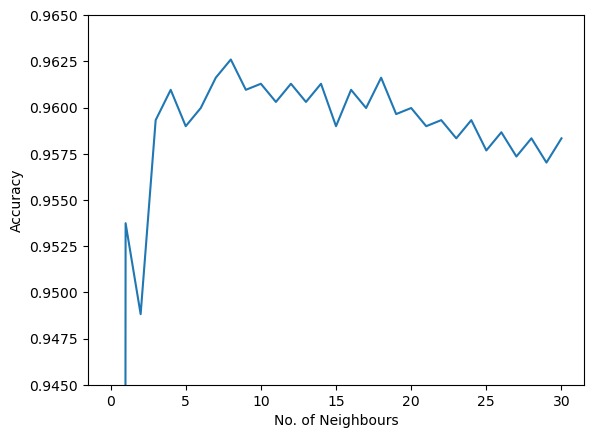

In [8]:
# iteratively do KNN and get best k size
accuracy_result = []
# append one element to fill in k size = 0
accuracy_result.append(0)

for k in range(1, 31):
    accuracy = KNN(k)
    accuracy_result.append(accuracy)


max_accuracy = max(accuracy_result)
max_index = accuracy_result.index(max_accuracy)
print("The best accuracy is {:.5f} with {} nearest neighbours.".format(max_accuracy, max_index))
sns.lineplot(data=accuracy_result)
plt.ylabel("Accuracy")
plt.xlabel("No. of Neighbours")
plt.ylim(0.945, 0.965)
plt.show()


So, the best no. of neighbours is 8 for our model, with an accuracy of **~96%**. 

classification_report:
              precision    recall  f1-score   support

       False       0.98      0.95      0.96      1559
        True       0.94      0.98      0.96      1489

    accuracy                           0.96      3048
   macro avg       0.96      0.96      0.96      3048
weighted avg       0.96      0.96      0.96      3048

Accuracy:  0.9625984251968503


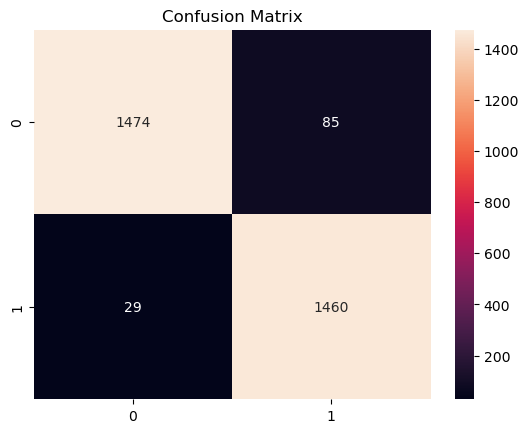

In [9]:
print('Accuracy: ',KNN(8, True))

**Comments:**    

We can see that the accuracy is really high, however the model currently uses the final count of each variable at the end of a game, this means that it can only predict the outcome of the game after the game has ended, and this has no practical value at all. So, lets try to predict with only data from 30 minutes!

---

## KNN: 30 Minutes

For this, the procedure is basically the same as above.   

### Data Preparation

Now we will only use data until 30 minutes of every game. We will first take out the games with less than 30 minutes of gameplay since we want to make sure that our model's final accuracy is based on partial data of a game. If not, some data will still be the full game of some matches.

In [10]:
T_LENGTH = 30

# helper function to convert variables into an array showing how many of that event occurred every minute in the game
def to_array(x):
    array = np.zeros(T_LENGTH, dtype=np.int8) # an array of zeros of length=T_LENGTH, here we will use the smallest int8 since the number wont be big
    for time in range(T_LENGTH):
        for item in x:
            if item[0] <= time+1:
                array[time] += 1

    return array

def to_array_gold(x):
    array = []
    for time in range(T_LENGTH):
        try:
            array.append(x[time])
        except IndexError:
            array.append(array[-1])

    return array

def getLastValue(aList):
    return aList[-1]

In [22]:
# remove matches that is less than 30 minutes
clean_df = clean_df[clean_df['gamelength'] >= T_LENGTH]
clean_df = clean_df.reset_index(drop=True)
clean_df.shape

(6384, 58)

In [26]:
# combine red and blue variables by making a new columns representing their differences
blue_matches = pd.DataFrame()

blue_matches['TotalGold'] = clean_df['goldblue'].apply(to_array_gold).apply(getLastValue)
blue_matches['TotalKills'] = clean_df['bKills'].apply(to_array).apply(getLastValue)
blue_matches['TotalTowers'] = clean_df['bTowers'].apply(to_array).apply(getLastValue)
blue_matches['TotalDragons'] = clean_df['bDragons'].apply(to_array).apply(getLastValue)
blue_matches['TotalInhibs'] = clean_df['bInhibs'].apply(to_array).apply(getLastValue)
blue_matches['TotalBarons'] = clean_df['bBarons'].apply(to_array).apply(getLastValue)
blue_matches['TotalHeralds'] = clean_df['bHeralds'].apply(to_array).apply(getLastValue)
blue_matches['won'] = False
blue_matches.loc[clean_df['winner'] == 1, 'won'] = True

red_matches = pd.DataFrame()

red_matches['TotalGold'] = clean_df['goldred'].apply(to_array_gold).apply(getLastValue)
red_matches['TotalKills'] = clean_df['rKills'].apply(to_array).apply(getLastValue)
red_matches['TotalTowers'] = clean_df['rTowers'].apply(to_array).apply(getLastValue)
red_matches['TotalDragons'] = clean_df['rDragons'].apply(to_array).apply(getLastValue)
red_matches['TotalInhibs'] = clean_df['rInhibs'].apply(to_array).apply(getLastValue)
red_matches['TotalBarons'] = clean_df['rBarons'].apply(to_array).apply(getLastValue)
red_matches['TotalHeralds'] = clean_df['rHeralds'].apply(to_array).apply(getLastValue)
red_matches['won'] = False
red_matches.loc[clean_df['winner'] == 2, 'won'] = True

all_matches = pd.concat([blue_matches, red_matches])
all_matches

TotalGold  TotalKills  TotalTowers  TotalDragons  TotalInhibs  \
0         45845           9            6             0            1   
1         43767           8            5             2            0   
2         49255          15            6             2            0   
3         41672           7            3             0            0   
4         46935          14            4             1            0   
...         ...         ...          ...           ...          ...   
6379      53774           7            3             3            0   
6380      54297          12            5             3            0   
6381      52150          12            6             1            0   
6382      48746           2            2             0            0   
6383      54006          12            4             2            0   

      TotalBarons  TotalHeralds    won  
0               0             0   True  
1               1             0  False  
2               0             0   True  
3               0             0  False  
4               0             0   True  
...           ...           ...    ...  
6379            1             0   True  
6380            1             0   True  
6381            0             1   True  
6382            0             0  False  
6383            1             0   True  

[12768 rows x 8 columns]

### Data Visualisation 

Visualise to see any obvious grouping of data points.   

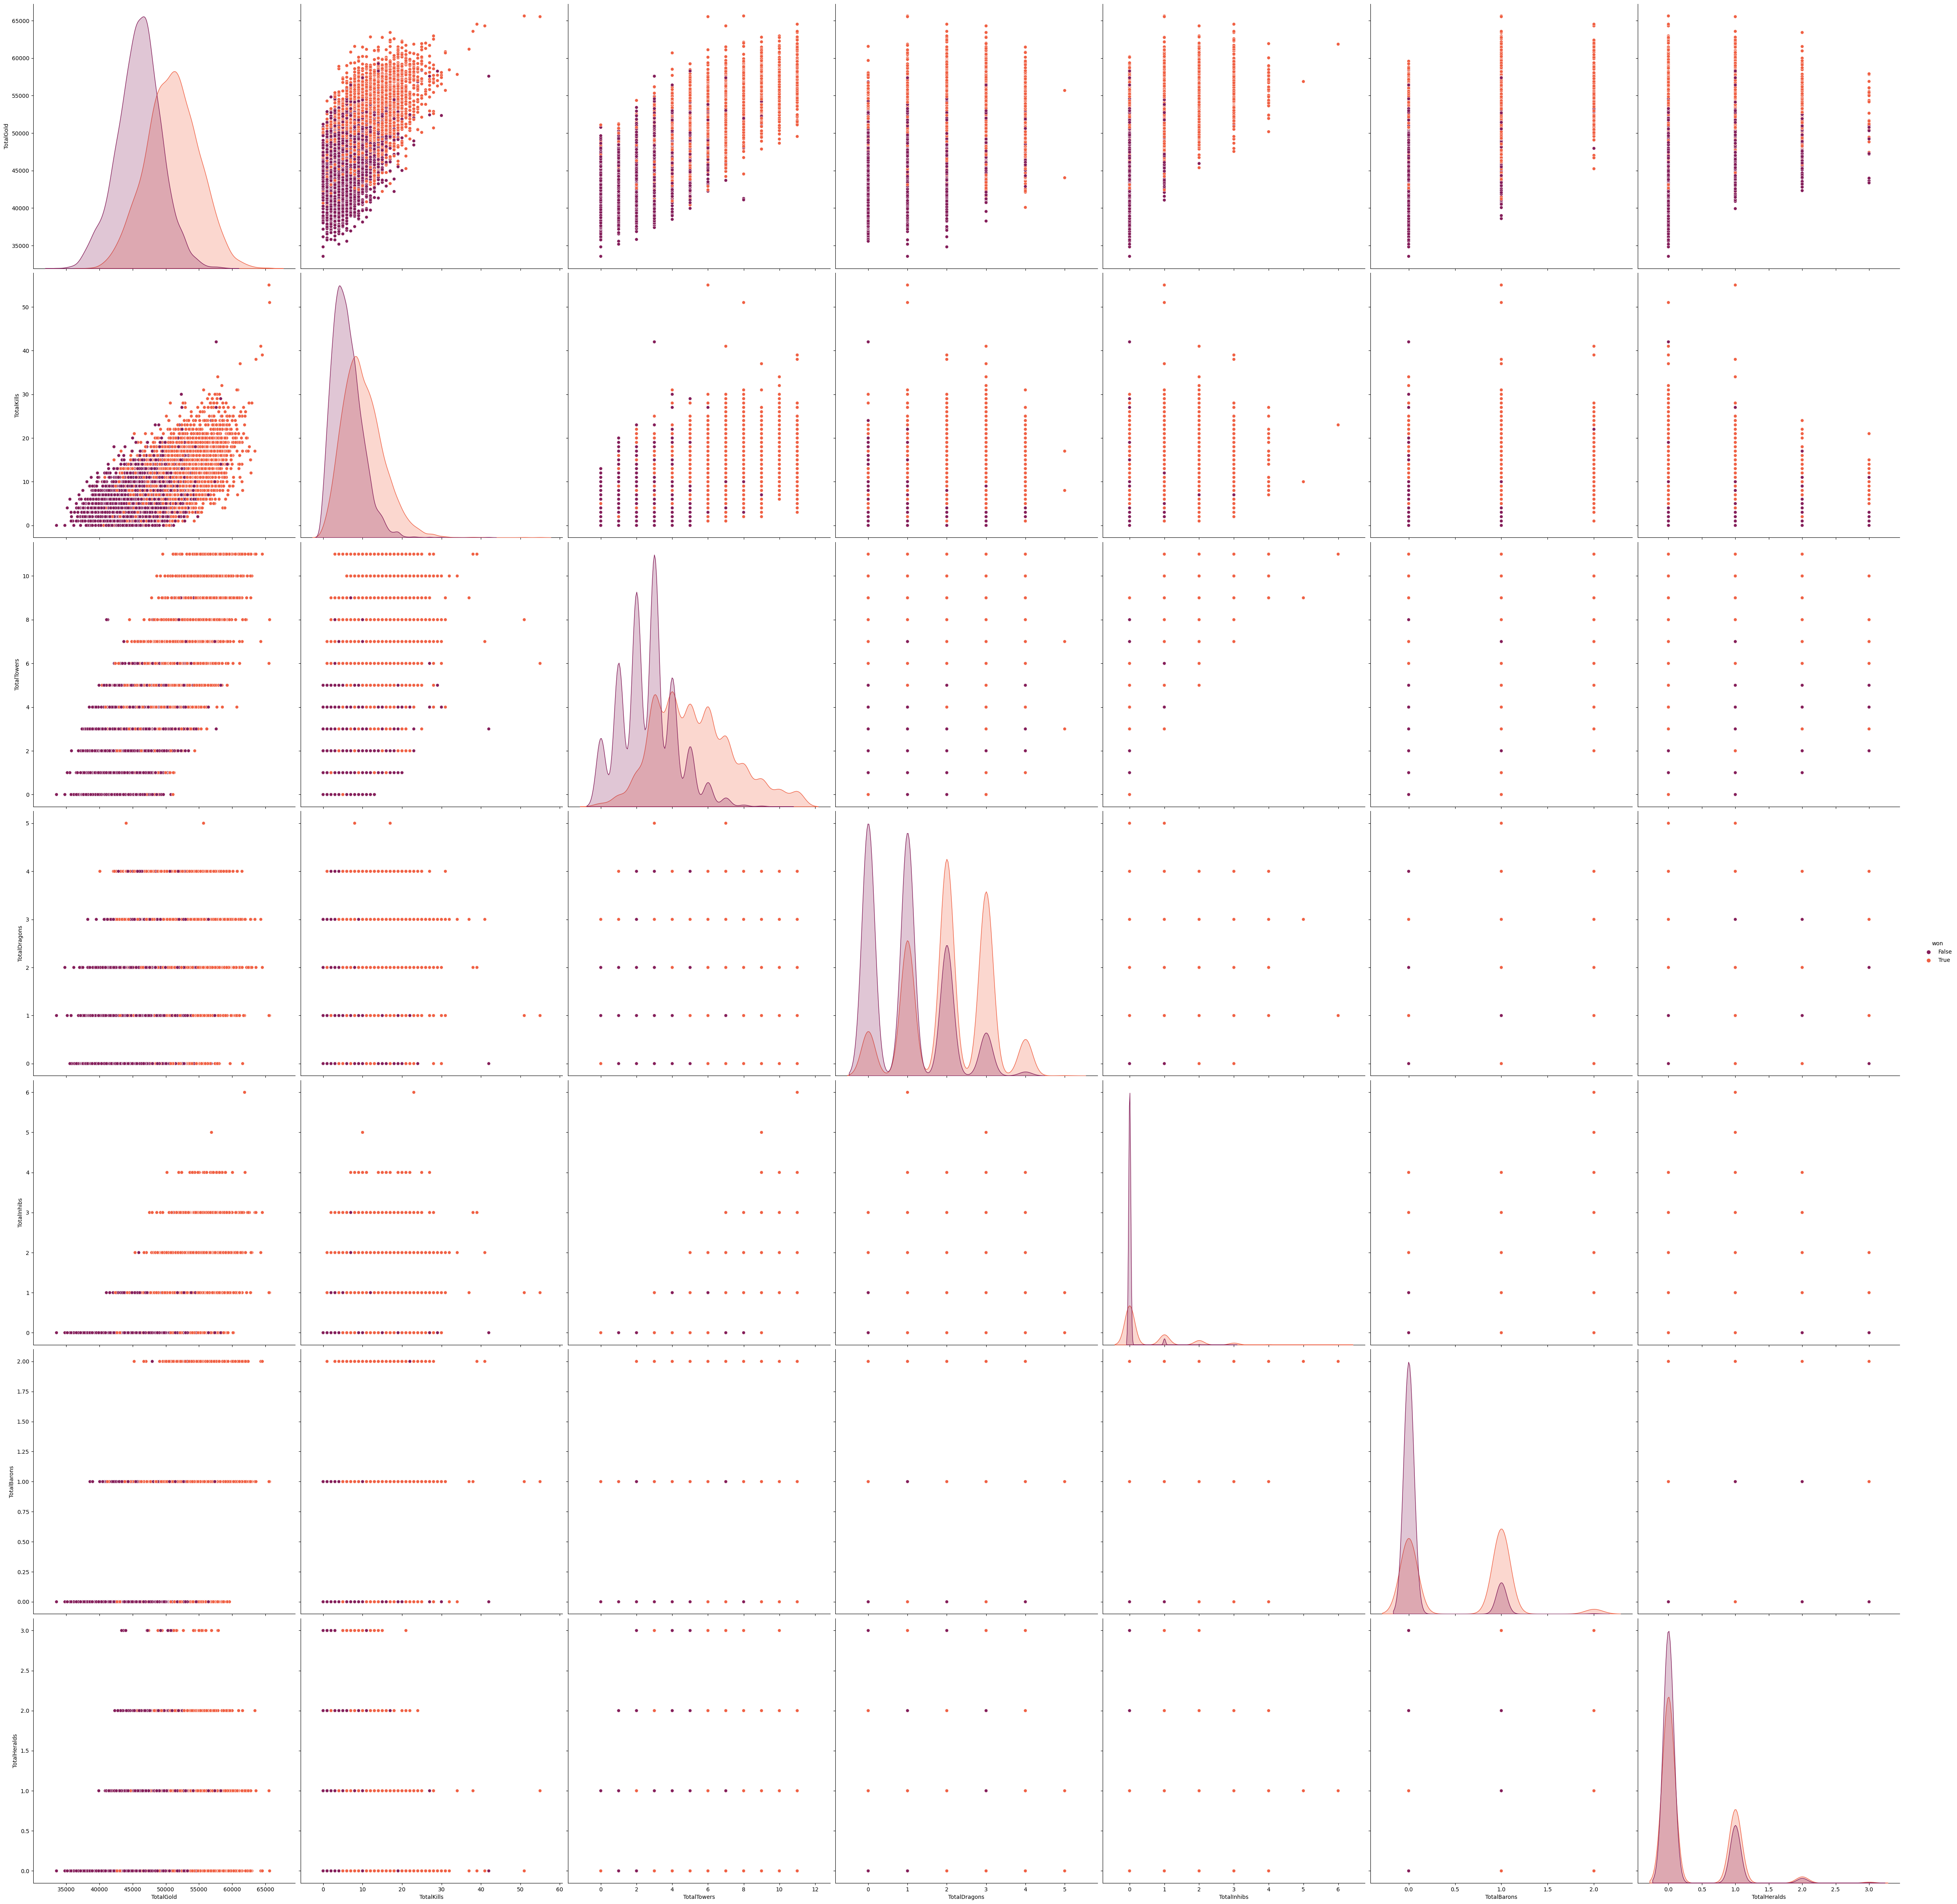

In [27]:
sns.pairplot(all_matches, hue='won', height=7, palette='rocket')
plt.show()

### Data Normalisation

Same thing, we have to scale the data.

In [32]:
x_data = all_matches.drop(['won'], axis=1)
y_data = all_matches['won']

MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)

data = pd.DataFrame(X_data_minmax, columns=['TotalGold', 'TotalKills', 'TotalTowers', 'TotalDragons', 'TotalInhibs', 'TotalBarons', 'TotalHeralds'])
data

TotalGold  TotalKills  TotalTowers  TotalDragons  TotalInhibs  \
0       0.382971    0.163636     0.545455           0.0     0.166667   
1       0.318139    0.145455     0.454545           0.4     0.000000   
2       0.489361    0.272727     0.545455           0.4     0.000000   
3       0.252777    0.127273     0.272727           0.0     0.000000   
4       0.416979    0.254545     0.363636           0.2     0.000000   
...          ...         ...          ...           ...          ...   
12763   0.630351    0.127273     0.272727           0.6     0.000000   
12764   0.646668    0.218182     0.454545           0.6     0.000000   
12765   0.579683    0.218182     0.545455           0.2     0.000000   
12766   0.473481    0.036364     0.181818           0.0     0.000000   
12767   0.637589    0.218182     0.363636           0.4     0.000000   

       TotalBarons  TotalHeralds  
0              0.0      0.000000  
1              0.5      0.000000  
2              0.0      0.000000  
3              0.0      0.000000  
4              0.0      0.000000  
...            ...           ...  
12763          0.5      0.000000  
12764          0.5      0.000000  
12765          0.0      0.333333  
12766          0.0      0.000000  
12767          0.5      0.000000  

[12768 rows x 7 columns]

### Model Fitting
Now with the data prepared, we can do the train / test split then train the KNN model.

In [28]:
# train test split here
X_train, X_test, y_train, y_test = train_test_split(data, y_data, test_size=0.2, random_state=1)

classification_report:
              precision    recall  f1-score   support

       False       0.76      0.73      0.75      1329
        True       0.72      0.75      0.74      1225

    accuracy                           0.74      2554
   macro avg       0.74      0.74      0.74      2554
weighted avg       0.74      0.74      0.74      2554

Accuracy:  0.7419733750978856


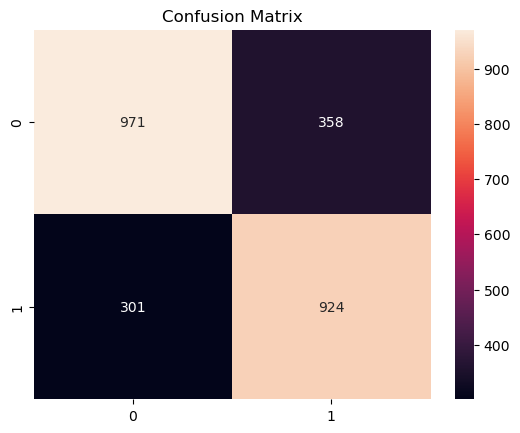

In [29]:
print('Accuracy: ',KNN(1, True))

Yup, as expected we are getting a significant drop in accuracy **~74%** since we are only utilising partial data of a match here.   

### Hyper Parameter Tuning

It is even more important too optimise our k-size here in order to obtain a model with higher accuracy.

The best accuracy is 0.81872 with 26 nearest neighbours.


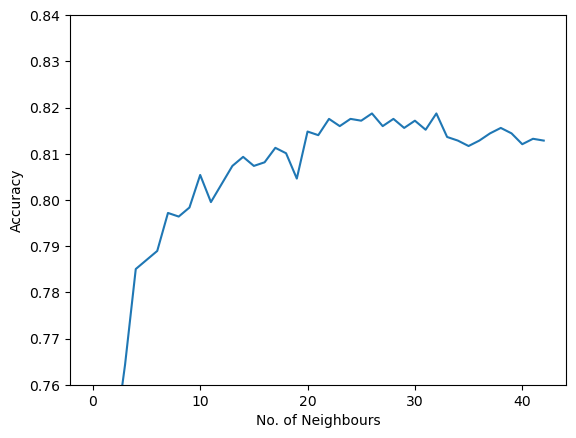

In [30]:
# iteratively do KNN and get best k size
accuracy_result = []
# append one element to fill in k size = 0
accuracy_result.append(0)
# early stop
earlystop_count = 0

for k in range(1, 101):
    accuracy = KNN(k)
    accuracy_result.append(accuracy)
    if accuracy < max(accuracy_result):
        earlystop_count += 1
    else:
        earlystop_count = 0
    if earlystop_count >= 10:
        break


max_accuracy = max(accuracy_result)
max_index = accuracy_result.index(max_accuracy)
print("The best accuracy is {:.5f} with {} nearest neighbours.".format(max_accuracy, max_index))
sns.lineplot(data=accuracy_result)
plt.ylabel("Accuracy")
plt.xlabel("No. of Neighbours")
plt.ylim(0.76, 0.84)
plt.show()

classification_report:
              precision    recall  f1-score   support

       False       0.82      0.82      0.82      1329
        True       0.81      0.81      0.81      1225

    accuracy                           0.81      2554
   macro avg       0.81      0.81      0.81      2554
weighted avg       0.81      0.81      0.81      2554

Accuracy:  0.8144087705559906


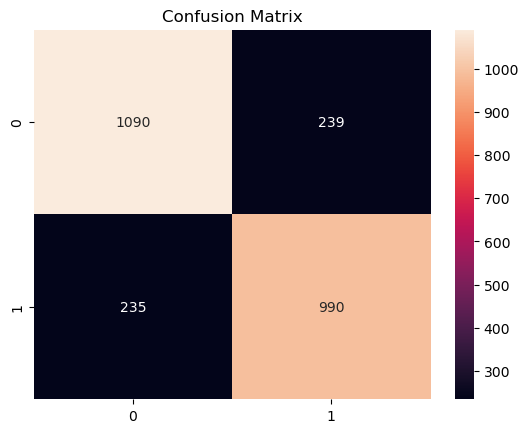

In [31]:
print('Accuracy: ',KNN(50, True))

Finally, after optimisation we are able to obtain a model with accuracy of **~81.4%**. Pretty good for a supervised machine learning model.   

---

## Conclusion

We can see that K Nearest Neighbour is a solid machine learning model, being able to produce an high accuracy of **~96%** when fed with the full game data, and a decent accuracy of **~81.4%** when using partial game data. We can also see the importance of tuning the hyper parameter in order to optimise our accuracy. 

---

Continue in `RNN.ipynb`